# ***STROKE PATIENT PREDICTION***

<br>**Import Basic Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [2]:
st=pd.read_csv('healthcare-dataset-stroke-data.csv')
st.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


***PROBLEM STATEMENT*** : *THE PATIENT WILL SUFFER FROM STROKE OR NOT.*

**Count of Null Values**

In [3]:
st.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Fill Null Values with Mean of bmi**

In [4]:
m=st['bmi'].mean()
st['bmi'].fillna(m,inplace=True)

**Check for Null Values**

In [5]:
st.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Shape of Dataset**

In [6]:
st.shape

(5110, 12)

**Data types of Features**

In [7]:
st.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Remove Unwanted Features/Columns**

In [8]:
st.drop('id',inplace=True,axis=1)

**Duplicate values**

In [9]:
st.duplicated().sum()

0

***Visualise Null Values***

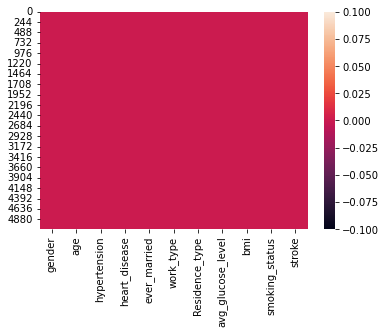

In [10]:
sns.heatmap(st.isnull())
plt.show()

We have filled null values, dropped duplicate values and dropped unwanted features. 

We have both numericala and categorical features in our dataset so we split dataset 

and then apply Label Encoder to convert categorical to numerical and then merge dataset. 



**Split Dataset into Numerical and Categorical Type**

In [11]:
st_num=st.select_dtypes(['int64','float64'])
st_cat=st.select_dtypes(object)

In [12]:
st_num.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [13]:
st_cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

**Apply Label Encoder on Categorical Columns**

In [14]:
from sklearn.preprocessing import LabelEncoder
column=st_cat.columns
for c in column:
  le=LabelEncoder()
  st_cat[c]=le.fit_transform(st_cat[c])

**Concat Categorical & Numerical Columns**

In [15]:
st=pd.concat([st_cat,st_num],axis=1)
st.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,79.0,1,0,174.12,24.000000,1


**Check whether Data is Balanced/Not**


In [16]:
st['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

***Visualise by Countplot***

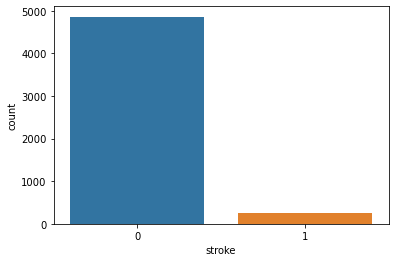

In [17]:
sns.countplot(data=st,x='stroke')
plt.show()

**<u>CONCLUSION</u>**: As we can clearly see data is imbalance.First we split dataset in 70%-30% ,

apply standard scaler to get data in same unit and then we will apply Random Over Sampler 

on output training and testing data to balance dataset.

**Select Input & Output**

In [18]:
x=st.drop('stroke',axis=1)
y=st['stroke']

***Split the Data into 70% and 30%***


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

**Apply Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

**Apply Over Sampling to Balance the Dataset**

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)

**Over Sampling on Training Data**

In [22]:
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

**After applying Over Sampling**

In [23]:
y_train_ros.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

**Over Sampling on Testing Data**

In [24]:
y_test.value_counts()

0    1450
1      83
Name: stroke, dtype: int64

In [25]:
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [26]:
y_test_ros.value_counts()

0    1450
1    1450
Name: stroke, dtype: int64

***Create function to Find Predicted value,Classification Report,Confusion Matrix***

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

def stroke(obj):
  obj.fit(x_train_ros,y_train_ros)
  y_pred=obj.predict(x_test_ros)
  print(classification_report(y_test_ros,y_pred))
  print(confusion_matrix(y_test_ros,y_pred))
  return obj

We created function which will work on each algorithm,we just import different

 algorithms, create object and pass that object in our function.

# ***Modelling***

**1.Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=stroke(lr)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1450
           1       0.75      0.85      0.80      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1048  402]
 [ 223 1227]]


**2.Decision Tree Classifier**  

**a)Gini**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.52      0.97      0.68      1450
           1       0.79      0.12      0.21      1450

    accuracy                           0.55      2900
   macro avg       0.66      0.55      0.45      2900
weighted avg       0.66      0.55      0.45      2900

[[1404   46]
 [1272  178]]


**b)Entropy**

In [30]:
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      1450
           1       0.82      0.16      0.27      1450

    accuracy                           0.56      2900
   macro avg       0.68      0.56      0.48      2900
weighted avg       0.68      0.56      0.48      2900

[[1399   51]
 [1212  238]]


**<u>CONCLUSION</u>**:
Scores by Decision Tree Classifier are not good. So we apply

 pruning technique to check whether model is overfit/not.

<br>**Pruning Technique** 

**3.Max depth    
a)Gini**

In [31]:
dt=DecisionTreeClassifier(random_state=1,max_depth=4)
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1450
           1       0.76      0.80      0.78      1450

    accuracy                           0.77      2900
   macro avg       0.77      0.77      0.77      2900
weighted avg       0.77      0.77      0.77      2900

[[1079  371]
 [ 297 1153]]


**Information Gain/Important Features**

In [32]:
ig=dt.feature_importances_
d={'Input':x.columns,'ig':ig}
df=pd.DataFrame(d)
df.sort_values('ig',ascending=False)

,Input,ig
5,age,0.837789
9,bmi,0.089239
8,avg_glucose_level,0.061501
1,ever_married,0.007924
3,Residence_type,0.003547
0,gender,0.000000
2,work_type,0.000000
4,smoking_status,0.000000
6,hypertension,0.000000
7,heart_disease,0.000000


**Visualize by Tree diagram**


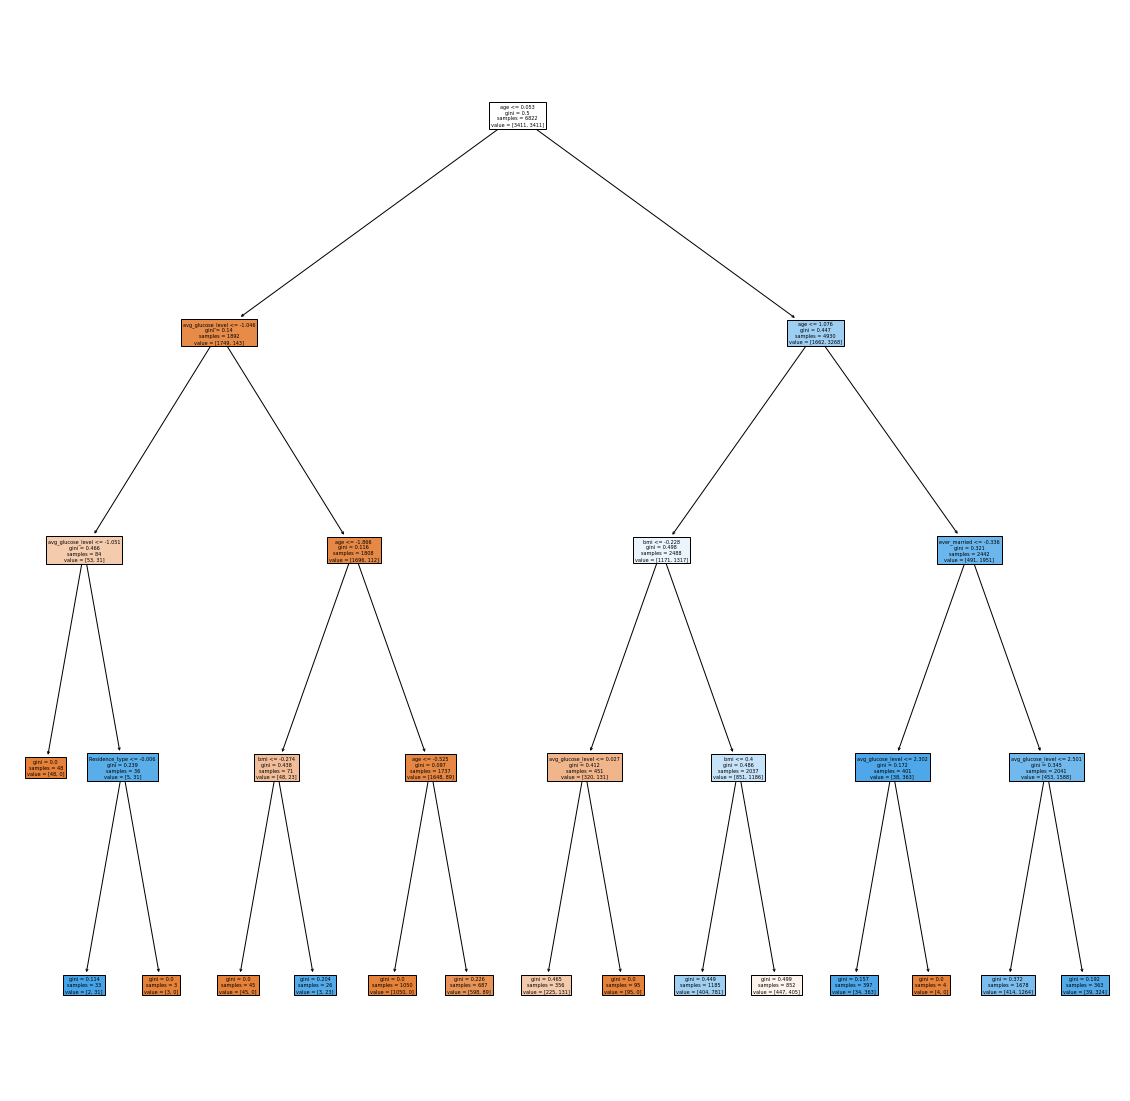

In [33]:
from sklearn import tree
feature=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,filled=True,feature_names=feature)
plt.show()

**3.Max depth**

**b)Entropy**

In [34]:
dt=DecisionTreeClassifier(random_state=1,max_depth=5,criterion='entropy')
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1450
           1       0.76      0.78      0.77      1450

    accuracy                           0.76      2900
   macro avg       0.76      0.76      0.76      2900
weighted avg       0.76      0.76      0.76      2900

[[1085  365]
 [ 322 1128]]


<br>**4.Min Samples Leaf**

**a)Gini**

In [35]:
dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=80)
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.72      0.76      0.73      1450
           1       0.74      0.70      0.72      1450

    accuracy                           0.73      2900
   macro avg       0.73      0.73      0.73      2900
weighted avg       0.73      0.73      0.73      2900

[[1095  355]
 [ 435 1015]]


<br>**4.Min Samples Leaf**

**b)Entropy**

In [36]:
dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=72,criterion='entropy')
dt=stroke(dt)

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1450
           1       0.73      0.70      0.71      1450

    accuracy                           0.72      2900
   macro avg       0.72      0.72      0.72      2900
weighted avg       0.72      0.72      0.72      2900

[[1074  376]
 [ 436 1014]]


**Information Gain/Important Features**

In [37]:
ig=dt.feature_importances_
d1={'input':x.columns,'ig':ig}
df1=pd.DataFrame(d1)
df1.sort_values('ig',ascending=False)

,input,ig
5,age,0.592244
8,avg_glucose_level,0.151261
9,bmi,0.145090
3,Residence_type,0.029925
2,work_type,0.026492
0,gender,0.017608
7,heart_disease,0.015757
1,ever_married,0.008046
4,smoking_status,0.007108
6,hypertension,0.006471


**Visualize by Tree diagram**


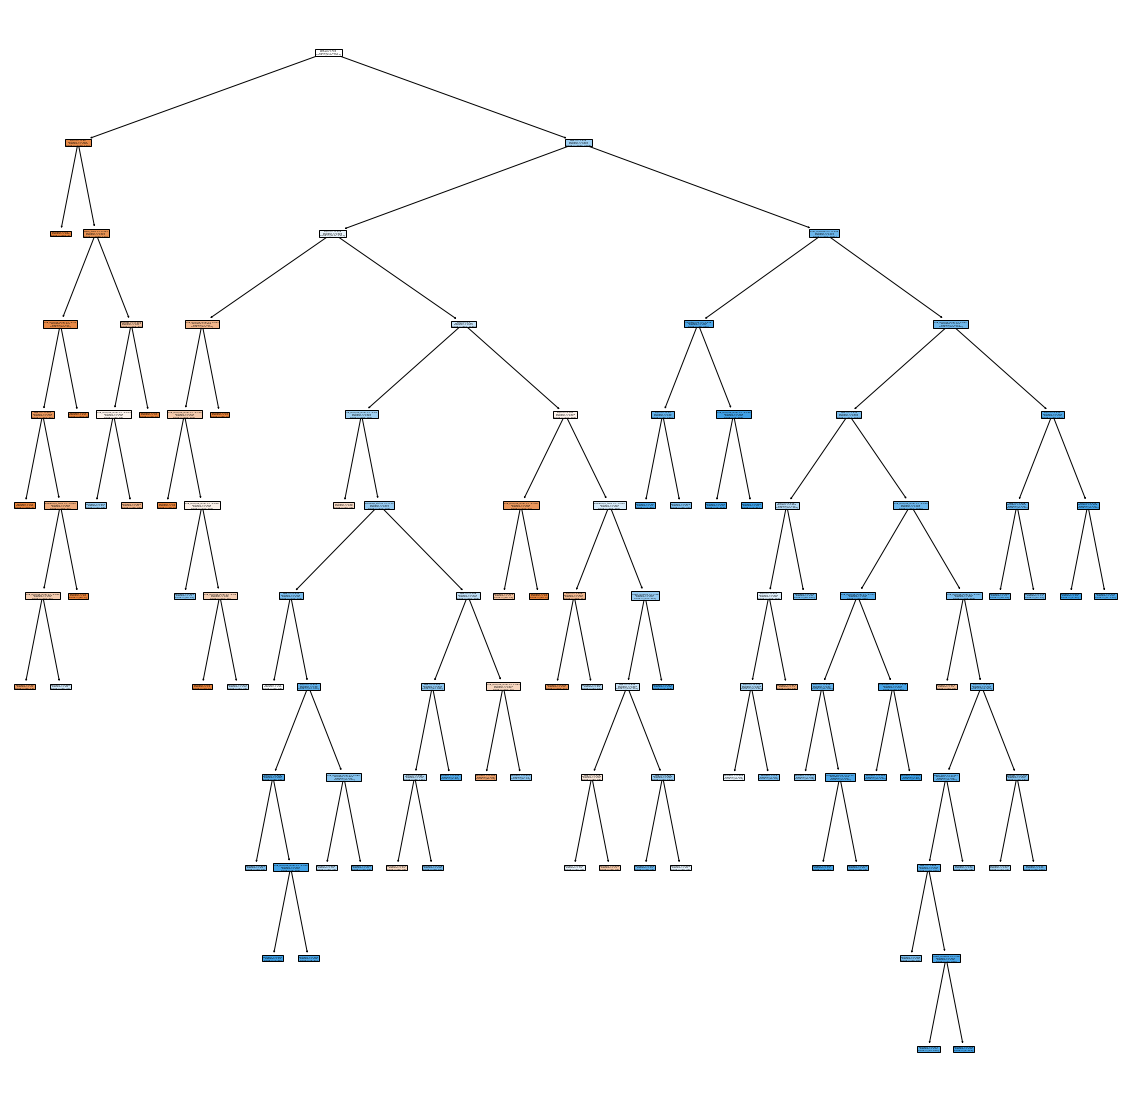

In [38]:
from sklearn import tree
feature=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,filled=True,feature_names=feature)
plt.show()

**<u>ENSEMBLING TECHNIQUE:</u>**

**5.Random Forest Classifier**

**a)Gini**

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1,max_features=8,n_estimators=1)
rfc=stroke(rfc)

              precision    recall  f1-score   support

           0       0.56      0.95      0.70      1450
           1       0.84      0.24      0.37      1450

    accuracy                           0.60      2900
   macro avg       0.70      0.60      0.54      2900
weighted avg       0.70      0.60      0.54      2900

[[1382   68]
 [1101  349]]


<br>**5.Random Forest Classifier**

**b)Entropy**

In [40]:
rfc=RandomForestClassifier(random_state=1,max_features=9,n_estimators=1,criterion='entropy')
rfc=stroke(rfc)

              precision    recall  f1-score   support

           0       0.56      0.94      0.70      1450
           1       0.81      0.27      0.40      1450

    accuracy                           0.60      2900
   macro avg       0.69      0.60      0.55      2900
weighted avg       0.69      0.60      0.55      2900

[[1360   90]
 [1063  387]]


<br>**6.Ada Boost Classifier(Adapter Boosting)**

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1,n_estimators=3)
ada=stroke(ada)

              precision    recall  f1-score   support

           0       0.90      0.57      0.70      1450
           1       0.69      0.94      0.79      1450

    accuracy                           0.76      2900
   macro avg       0.80      0.76      0.75      2900
weighted avg       0.80      0.76      0.75      2900

[[ 833  617]
 [  90 1360]]


<br>**7.Gradient Boost Classifier**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=12)
gbc=stroke(gbc)

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1450
           1       0.76      0.87      0.81      1450

    accuracy                           0.80      2900
   macro avg       0.80      0.80      0.79      2900
weighted avg       0.80      0.80      0.79      2900

[[1050  400]
 [ 193 1257]]


<br>**Information Gain/Important Features**

In [43]:
ig=gbc.feature_importances_
d1={'input':x.columns,'ig':ig}
df1=pd.DataFrame(d1)
df1.sort_values('ig',ascending=False)

,input,ig
5,age,0.842172
9,bmi,0.080733
8,avg_glucose_level,0.050298
0,gender,0.008471
1,ever_married,0.008384
2,work_type,0.004974
4,smoking_status,0.004967
3,Residence_type,0.000000
6,hypertension,0.000000
7,heart_disease,0.000000


**8.XGB Classifier(Extreme Gradient Boost Classifier)**

In [44]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1,n_estimators=27)
xgb=stroke(xgb)

              precision    recall  f1-score   support

           0       0.59      0.90      0.71      1450
           1       0.79      0.36      0.50      1450

    accuracy                           0.63      2900
   macro avg       0.69      0.63      0.60      2900
weighted avg       0.69      0.63      0.60      2900

[[1311  139]
 [ 927  523]]


<br>**<u>SUPPORT VECTOR MACHINE(SVM)</u>**

**9.Linear Support Vector Classifier(LinearSVC)**

In [45]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=stroke(svc)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1450
           1       0.75      0.85      0.79      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1038  412]
 [ 223 1227]]


<br>**10.Linear Support Vector Classifier**

***After adding error***

In [46]:
svc1=LinearSVC(random_state=1,C=.1)   
svc1=stroke(svc1)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1450
           1       0.75      0.85      0.79      1450

    accuracy                           0.78      2900
   macro avg       0.79      0.78      0.78      2900
weighted avg       0.79      0.78      0.78      2900

[[1038  412]
 [ 223 1227]]


**<u>CONCLUSION</u>**:There is no change in score as per C. Which means the data 

is not linearly separating i.e. the dataset is non-linear.


<br>**11.SVC Polynomial Kernel Function**

In [47]:
from sklearn.svm import SVC
sv_poly=SVC(random_state=1,kernel='poly')
sv_poly=stroke(sv_poly)

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1450
           1       0.74      0.54      0.62      1450

    accuracy                           0.67      2900
   macro avg       0.69      0.67      0.67      2900
weighted avg       0.69      0.67      0.67      2900

[[1178  272]
 [ 671  779]]


<br>**12.SVC Radial Basis Kernel Function**

In [48]:
sv_r=SVC(random_state=1,kernel='rbf')
sv_r=stroke(sv_r)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1450
           1       0.72      0.56      0.63      1450

    accuracy                           0.67      2900
   macro avg       0.68      0.67      0.67      2900
weighted avg       0.68      0.67      0.67      2900

[[1139  311]
 [ 633  817]]


<br>**13.KNeighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knc=stroke(knc)

              precision    recall  f1-score   support

           0       0.53      0.90      0.66      1450
           1       0.65      0.20      0.30      1450

    accuracy                           0.55      2900
   macro avg       0.59      0.55      0.48      2900
weighted avg       0.59      0.55      0.48      2900

[[1298  152]
 [1165  285]]


<br>**14.Gaussian Naive Bayes(GaussianNB)**

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=stroke(gnb)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1450
           1       0.76      0.79      0.78      1450

    accuracy                           0.77      2900
   macro avg       0.77      0.77      0.77      2900
weighted avg       0.77      0.77      0.77      2900

[[1092  358]
 [ 304 1146]]


<br>**<u>CONCLUSION:</u>**


*  In our classification model we have used 18 different 

    algorithms mentioned in below table with there scores.
*  The best result we got is in **Ada Boost Classifier i.e. 0.94**





<pre><b style=font-size:17px>Machine Learning Algorithms                 Results (Recall 1)</b>
------------------------------------------------------- -----------------
1.Logistic Regression                                      0.85

2.Decision Tree Classifier  (Gini)                         0.12
                                                          
3.Decision Tree Classifier  (Entropy)                      0.16
                                                          
4.Decision Tree Classifier  Max Depth (Gini)               0.80
                                                          
5.Decision Tree Classifier  Max Depth (Entropy)            0.78 
                                                          
6.Decision Tree Classifier  Min Samples Leaf (Gini)        0.70
                                                          
7.Decision Tree Classifier  Min Samples Leaf (Entropy)     0.70
                                                          
8.Random Forest Classifier (Gini)                          0.24
                                                          
9.Random Forest Classifier (Entropy)                       0.27
                                                          
<mark style=background:#6495ed>10.Ada Boost Classifier                                    0.94</mark>
                                                          
<mark style=background:#add8e6>11.Gradient Boost Classifier                               0.87</mark>
                                                          
<mark style=background:#89cff0>12.Extreme Gradient Boost Classifier                       0.88</mark>
                                                          
13.Linear SVC                                              0.85
                                                          
14.Linear SVC(Adding Errors)                               0.85
                                                          
15.SVC Polynomial Kernel Function                          0.54
                                                          
16.SVC Radial Basis Kernel Function                        0.56
                                                          
17.KNeighbors Classifier                                   0.20

18.Gaussian Naive Bayes                                    0.79</pre>